In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
m = 4
parameters = np.loadtxt("/home/cillian/.eff_source_J/notebooks/python_parameters.dat")
Trad = parameters[0]
Omega_r = parameters[1]
Omega_phi = parameters[2]
e = parameters[3]
N = int(parameters[4])
number_of_modes = int(parameters[5])
print(N)

401


In [88]:
data = np.loadtxt("/home/cillian/.effective_source/output_data/eccentric_%.2f/output_t_m%d.txt" %(e, m))

In [89]:
t = np.zeros(len(data))
re_source = np.zeros(len(data))
im_source = np.zeros(len(data))
for i in np.arange(len(data)):
    t[i] = data[i][0]
    re_source[i] = data[i][4]
    im_source[i] = data[i][5]

eff_source = re_source + 1j * im_source
dt = t[1] - t[0]

In [90]:
fourier_modes = np.zeros(2* number_of_modes + 1, dtype=complex)
n = np.zeros(2*number_of_modes + 1)
for i in np.arange(-number_of_modes, number_of_modes + 1):
    n[i + 20] = i
    fourier_modes[i + 20] = ((1 /(Trad)) * np.trapezoid(eff_source * np.exp(1j * i * Omega_r * t) * np.exp(1j * m * Omega_phi*t), t))

In [91]:
fft_eff_source = np.fft.fftshift(np.fft.fft(eff_source * np.exp(1j * m * Omega_phi*t), n = N)) * dt
frequency = np.fft.fftshift(np.fft.fftfreq(n = N, d = dt))
omega = 2 * np.pi * frequency
# plt.plot(frequency, np.abs(fft_eff_source))

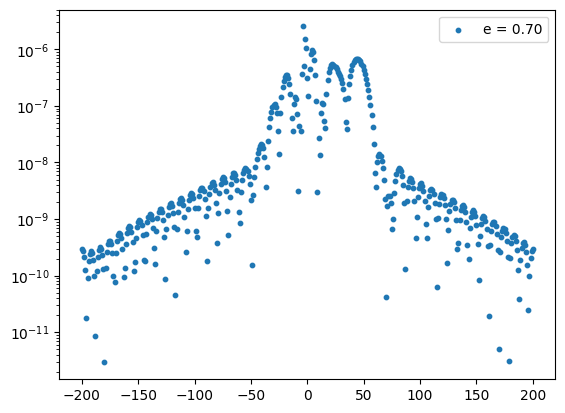

In [92]:
plt.scatter(n, np.abs(fourier_modes), label = "e = %.2f" %e, s = 10)
plt.yscale("log")
plt.legend()

In [13]:
plt.scatter(n, np.abs(m1_fourier_modes_ecc01), label = "e = 0.1", s = 10)
plt.scatter(n, np.abs(m1_fourier_modes_ecc03), label = "e = 0.3", s = 10)
plt.scatter(n, np.abs(m1_fourier_modes_ecc06), label = "e = 0.6", s = 10)
plt.scatter(n, np.abs(m1_fourier_modes_ecc08), label = "e = 0.6", s= 10)
plt.legend()
plt.title("m = 1")
plt.yscale("log")
# plt.savefig("eccentric_m1.png")

NameError: name 'm1_fourier_modes_ecc01' is not defined

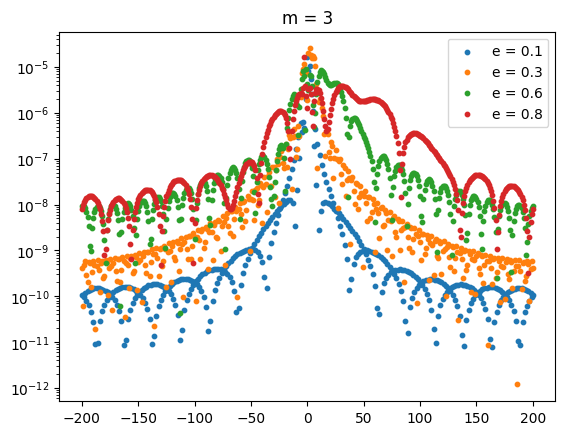

In [222]:
plt.scatter(n, np.abs(m3_fourier_modes_ecc01), label = "e = 0.1", s= 10)
plt.scatter(n, np.abs(m3_fourier_modes_ecc03), label = "e = 0.3", s=10)
plt.scatter(n, np.abs(m3_fourier_modes_ecc06), label = "e = 0.6",s=10)
plt.scatter(n, np.abs(m3_fourier_modes_ecc08), label = "e = 0.8",s=10)
plt.legend()
plt.title("m = 3")
plt.yscale("log")
plt.savefig("eccentric_m3.png")

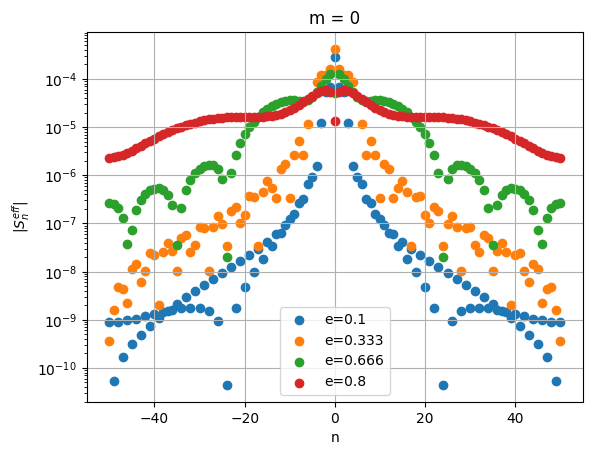

In [ ]:
plt.scatter(n, np.abs(fourier_modes_ecc01), label = "e=0.1")
plt.scatter(n, np.abs(fourier_modes_ecc03), label= "e=0.333")
plt.scatter(n, np.abs(fourier_modes_ecc06), label= "e=0.666")
plt.scatter(n, np.abs(fourier_modes_ecc08), label = "e=0.8")
plt.legend()
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("$|S^{eff}_n|$")
plt.grid(True)
plt.title("m = %d" %m)
# plt.savefig("./results/m%d/eccentric_0%d.png" %(m,ecc))
plt.savefig("eccentric_m0.png")

Text(0.5, 1.0, 'Example of effective source for field point r=10, rmin=8, rmax = 72')

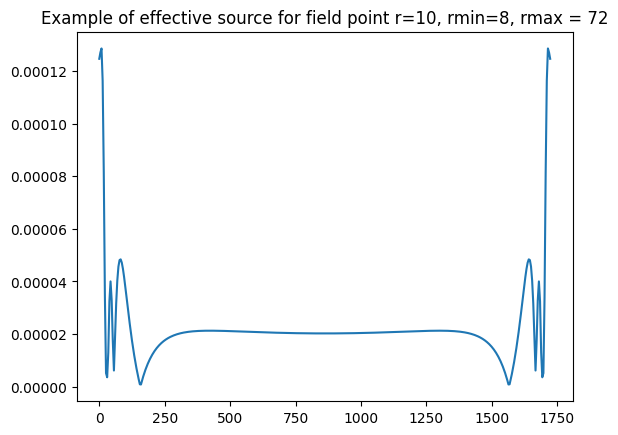

In [34]:
plt.plot(t, np.abs(eff_source))
# plt.yscale("log")
plt.title("Example of effective source for field point r=10, rmin=8, rmax = 72")
# plt.savefig("example_eff_source_")